##MNIST 분류기

In [ ]:
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 
from keras.utils import np_utils

Using TensorFlow backend.


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
28*28

784

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_train[1]

0

In [ ]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784) 
X_train = X_train.astype('float32')    
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255

In [ ]:
28*28


784

In [ ]:
Y_train[3]

1

In [ ]:
classes = 10 
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)

In [ ]:
Y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
input_size = 784 
batch_size = 100    
hidden_neurons = 400    
epochs = 5

##Hidden 뉴런이 있을 경우

In [ ]:
model = Sequential()     
 
# 아래 test_mode 를 변경(0-->1, 혹은 1-->0)하고 해보세요. 마지막 정확도가 변하는지 확인해보세요 
test_mode = 0
if test_mode ==0:
  model.add(Dense(hidden_neurons, input_dim=input_size))     
  model.add(Activation('relu'))         
  model.add(Dense(classes))     
  model.add(Activation('softmax')) 
else:    
  model.add(Dense(classes, input_dim=input_size))    
  model.add(Activation('softmax'))

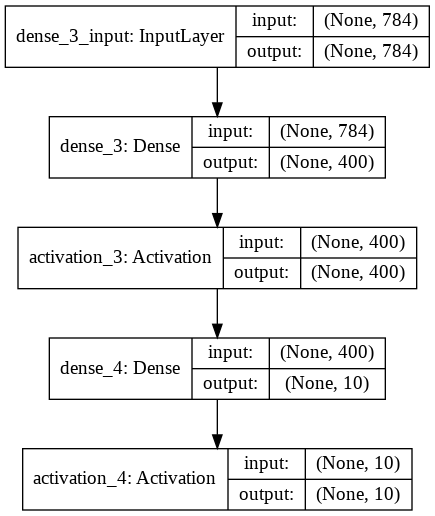

In [ ]:
from keras.utils import plot_model 
plot_model(model, to_file='model_mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2894 - accuracy: 0.9183
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.1261 - accuracy: 0.9640
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0865 - accuracy: 0.9747
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0652 - accuracy: 0.9809
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0512 - accuracy: 0.9854


In [ ]:
%%time
score = model.evaluate(X_test, Y_test, verbose=1) 
print('\n''Test accuracy:', score[1])

10000/10000 [==============================] - 0s 41us/step

Test accuracy: 0.9782000184059143
CPU times: user 538 ms, sys: 49.6 ms, total: 588 ms
Wall time: 416 ms


##두 가지 모델을 비교해 본 결과 히든 뉴런이 없이 학습을 하면 정확도가 떨어진다는 것을 알 수 있었다.
#히든 뉴런 있는 모델 정확도:0.97 
#히든 뉴런 없는 모델 정확도:0.92